# Урок 3. Операции над столбцами, DAU/MAU

## 3.1 Загрузка и подготовка данных

In [1]:
import pandas as pd

Загрузим данные:

In [2]:
data = pd.read_csv('lesson03_user_activity.csv')
data.head()

,user_id,device,date
0,74793686a6268281,iPhone,2021-02-01
1,6986c3d2188caf4b,Android,2021-02-01
2,d9a79c634cc6df36,iPhone,2021-02-01
3,b3b0c361708b69a9,PC,2021-02-01
4,48ddcd54a6844b70,Mac,2021-02-01


Посмотрим на типы и размерность данных:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  279463 non-null  object
 1   device   279463 non-null  object
 2   date     279463 non-null  object
dtypes: object(3)
memory usage: 6.4+ MB


In [4]:
pd.to_datetime(data['date']) # если мы просто при помощи функции pd.to_datetime отобразим столбец date в формате datetime
data['date']                 # это не приведет сразу к изменению всего фрейма (таблицы)

0         2021-02-01
1         2021-02-01
2         2021-02-01
3         2021-02-01
4         2021-02-01
             ...    
279458    2021-05-31
279459    2021-05-31
279460    2021-05-31
279461    2021-05-31
279462    2021-05-31
Name: date, Length: 279463, dtype: object

**Модифицируем типы данных** там, где это нужно (обновляем таблицу с новым типом данных столбца date):

In [5]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  279463 non-null  object        
 1   device   279463 non-null  object        
 2   date     279463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ MB


Вот теперь **формат** столбца date **изменен и сохранен** под новым типом данных (**datetime**) в таблице.

Теперь давайте разберемся, какие именно показатели хранятся в нашем фрейме:
- user_id - уникальный идентификатор пользователя;
- device - устройство, с которого было совершено посещение;
- date - дата посещения.

## 3.2 Бизнес показатели: DAU, WAU и MAU.

В рамках курса мы изучим несколько видов ключевых KPI (от англ key performance indicator - ключевой показатель эффективности), которые используются в бинес анализе и, в частности, в продуктовом анализе.

Первый из них - **DAU** (от английского daily active users - **ежедневные активные пользователи**). DAU используется для понимание того, как во времени меняется активность пользователей продукта. Сколько пользователей приходят пользоваться продуктом каждый день, расчет или падает число пользователей. 

DAU считается очень просто - на каждый календарный день расчитывается количество уникальных посетителей системы.

Кроме DAU есть еще **WAU** (от английского weekly active users - **еженедельные активные пользователи**) и **MAU** (от английского monthly active users - **ежемесяцные активные пользователи**). Чаще всего, тем не менее, используется DAU.

Забегая вперед (про группировки мы будем говорить немного позже), посмотрим, как мы можем расчитать DAU. Возьмем новый фрейм:

In [6]:
user_activity =  pd.read_csv('lesson03_user_activity.csv')
user_activity['date'] = pd.to_datetime(user_activity['date'])
user_activity.info()
user_activity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  279463 non-null  object        
 1   device   279463 non-null  object        
 2   date     279463 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ MB


,user_id,device,date
0,74793686a6268281,iPhone,2021-02-01
1,6986c3d2188caf4b,Android,2021-02-01
2,d9a79c634cc6df36,iPhone,2021-02-01
3,b3b0c361708b69a9,PC,2021-02-01
4,48ddcd54a6844b70,Mac,2021-02-01


При **изменении типа данных** столбца date **на datetime** добвится время т.к. ранее его не было, то добавится просто - **00:00:00**:

In [7]:
user_activity.loc[0, 'date'] # функция loc поможет нам увидеть полное значение ячейки, т.к. если время везде одинковое
                             # настройки его не показывают

Timestamp('2021-02-01 00:00:00')

Можно **убрать время** и оставить только дату добавив в конце **.dt.date**, давайте создадим такой новый столбец **date_only**:

In [8]:
user_activity['date_only'] = user_activity['date'].dt.date # извлекает только дату без времени, тип данных становится object
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    279463 non-null  object        
 1   device     279463 non-null  object        
 2   date       279463 non-null  datetime64[ns]
 3   date_only  279463 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 8.5+ MB


Давайте создадим новый столбец **date_month** в котором при помощи функции **.dt.to_period('M')** оставим только год и месяц:

In [9]:
user_activity['date_month'] = user_activity['date'].dt.to_period('M')  # тип данных становится period[M] разновидность
user_activity.info()                                                   # datetime обозначающая переодичность (month)
user_activity.head(5)                                                  # можно оставить только год заменив ('M') на ('Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279463 entries, 0 to 279462
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     279463 non-null  object        
 1   device      279463 non-null  object        
 2   date        279463 non-null  datetime64[ns]
 3   date_only   279463 non-null  object        
 4   date_month  279463 non-null  period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 10.7+ MB


,user_id,device,date,date_only,date_month
0,74793686a6268281,iPhone,2021-02-01,2021-02-01,2021-02
1,6986c3d2188caf4b,Android,2021-02-01,2021-02-01,2021-02
2,d9a79c634cc6df36,iPhone,2021-02-01,2021-02-01,2021-02
3,b3b0c361708b69a9,PC,2021-02-01,2021-02-01,2021-02
4,48ddcd54a6844b70,Mac,2021-02-01,2021-02-01,2021-02


Теперь когда мы **добавили необходимые столбцы** - можно по ним **группировать данные** во фрейме "user_activity":
- при помощи функции **groupby** группируем по столбцу **date_only**
- **.agg** агрегируем данные в столбце **user_id** при помощи функции **nunique**, получаем кол-во уникальных user_id на дату date_only
- аналог **в SQL** - select date_only, count(distinct user_id) from user_activity by date 

In [10]:
dau = user_activity.groupby('date_only').agg({'user_id': 'nunique'})
dau

,user_id
date_only,
2021-02-01,1727
2021-02-02,1899
2021-02-03,1994
2021-02-04,2102
2021-02-05,2248
...,...
2021-05-27,2068
2021-05-28,2170
2021-05-29,2389


**Переименуем все колонки** фрейма dau (**dau.columns**) в название "DAU". Все колонки потому, что у нас всего одна колонка **user_id**:
- **date** это название столбца по которому идет группировка из фрейма-источника (по сути индекс)

In [11]:
dau = user_activity.groupby('date').agg({'user_id': 'nunique'})
dau.columns = ['DAU']
dau.head(3)

,DAU
date,
2021-02-01,1727
2021-02-02,1899
2021-02-03,1994


Мы можем данные в одном столбце **сгруппировать сразу по нескольким функциям** например **nunique** и **count**:
- **nunique** кол-во уникальных пользователей на дату и **count** посчитать общее кол-во на дату
- **['nunique', 'count']** скобки указывают, на список функций применяемых к **'user_id'**
- сгруппируем в этот раз по столбцу **date_month** и списком дадим название столбцам - **['MAU', 'Число посещений']**

In [12]:
mau = user_activity.groupby('date_month').agg({'user_id': ['nunique', 'count']})
mau.columns = ['MAU', 'Число посещений']
mau.head(3)

,MAU,Число посещений
date_month,,
2021-02,44419,68537
2021-03,45849,72061
2021-04,41995,67397


К **списку функций** применяемых для user_id, можно **добавить функцию** для device:
- функция **first** просто выбирает **первое значение** в столбце из заданной группы

In [13]:
mau = user_activity.groupby('date_month').agg({'user_id': ['nunique', 'count'], 'device': 'first'})
mau

user_id          device
           nunique  count    first
date_month                        
2021-02      44419  68537   iPhone
2021-03      45849  72061   iPhone
2021-04      41995  67397  Android
2021-05      44046  71468   iPhone

**RENAME(COLUMNS...** изменение наименования одной колонки во фрейме, **inplace=True** - сразу сохраняет изменения во фрейме **mau**.

In [14]:
mau.rename(columns={'Число посещений': 'Кол-во посещений'}, inplace=True)
mau

user_id          device
           nunique  count    first
date_month                        
2021-02      44419  68537   iPhone
2021-03      45849  72061   iPhone
2021-04      41995  67397  Android
2021-05      44046  71468   iPhone

## 3.3 Построение простейших графиков

Возьмем наш фрейм dau и построим график изменений DAU во времени:

In [15]:
dau #по сути это фрейм с одним столбцом у которого значение date является индексами

,DAU
date,
2021-02-01,1727
2021-02-02,1899
2021-02-03,1994
2021-02-04,2102
2021-02-05,2248
...,...
2021-05-27,2068
2021-05-28,2170
2021-05-29,2389


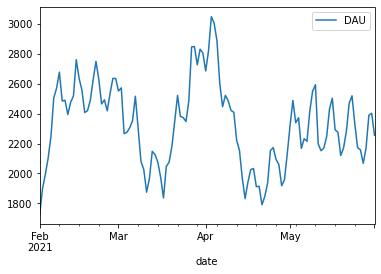

In [16]:
dau.plot(); #функция .plot добавляет график для фрейма dau

При помощи функции **figsize** можем **изменить размер графика**:

<AxesSubplot:xlabel='date'>

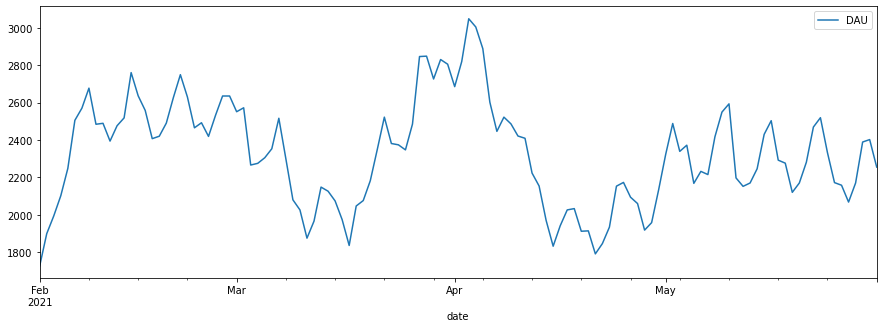

In [17]:
dau.plot(figsize = (15, 5)) # измеряется в дюймах

Установим **заголовоки и подписи осей**:

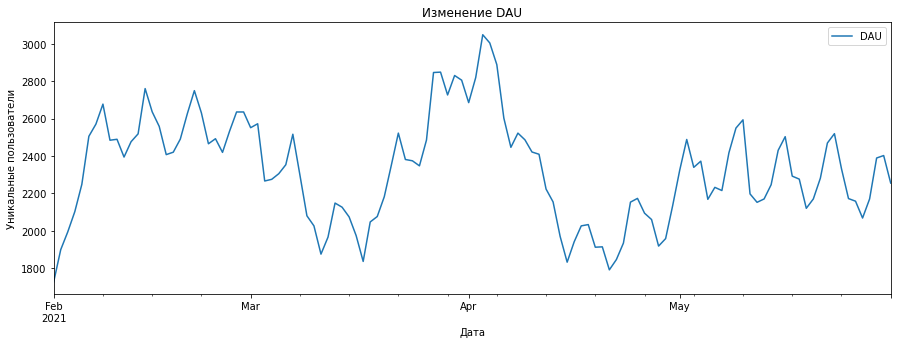

In [18]:
from matplotlib import pyplot as plt
dau.plot(figsize = (15, 5))
plt.title('Изменение DAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи');

In [19]:
data.head()

,user_id,device,date
0,74793686a6268281,iPhone,2021-02-01
1,6986c3d2188caf4b,Android,2021-02-01
2,d9a79c634cc6df36,iPhone,2021-02-01
3,b3b0c361708b69a9,PC,2021-02-01
4,48ddcd54a6844b70,Mac,2021-02-01


In [20]:
data['device'].value_counts() #подсчет всех девайсов во фрейме data без группировки по датам

iPhone     101838
Android     78984
Mac         51376
PC          47265
Name: device, dtype: int64

В **pandas** мы можем с помощью функции **pivot_table** построить **сводную таблицу**, где у нас будет не одна группировка, а две:
- первая группировка по индексу (колонка date): **index = 'date'**
- вторая группировка по колонке device: **columns = 'device'**
- значения для группировки берем из колонки user_id: **values = 'user_id'**
- агрегирующая функция для уникальных значений: **aggfunc = 'nunique'**

Построим чуть более сложный график - разбивку DAU по устройствам. Для этого, для начала сгруппируем данные по дате и устройству:

In [21]:
dau = data.pivot_table(index = 'date', columns = 'device', values = 'user_id', aggfunc = 'nunique')
dau.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Построим график:

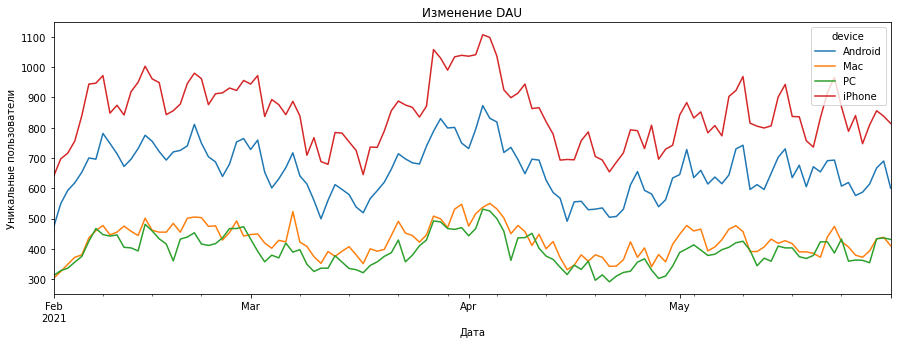

In [22]:
dau.plot(figsize = (15, 5))
plt.title('Изменение DAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи');

In [23]:
mau = user_activity.pivot_table(index = 'date_month', columns = 'device', values = 'user_id', aggfunc = 'nunique')
mau.head(5)

device,Android,Mac,PC,iPhone
date_month,,,,
2021-02,13157,7994,8152,16018
2021-03,13591,8404,8212,16616
2021-04,12366,7738,7605,15213
2021-05,13070,8047,8073,15898


Посмотрим так же на график **MAU**:

**Изображение графиков** можно **сохранить в виде картинки** (например с разрешением PNG):

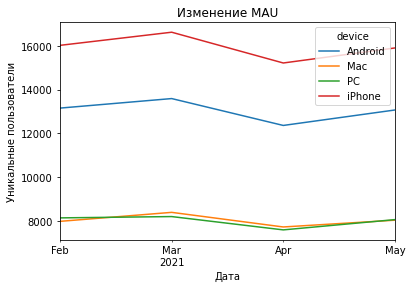

In [24]:
mau.plot()
plt.title('Изменение MAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи')
plt.savefig('test_plot.png') # данная строка сохраняет изображение графика в папеке с данным ноутбуком

In [25]:
user_activity

,user_id,device,date,date_only,date_month
0,74793686a6268281,iPhone,2021-02-01,2021-02-01,2021-02
1,6986c3d2188caf4b,Android,2021-02-01,2021-02-01,2021-02
2,d9a79c634cc6df36,iPhone,2021-02-01,2021-02-01,2021-02
3,b3b0c361708b69a9,PC,2021-02-01,2021-02-01,2021-02
4,48ddcd54a6844b70,Mac,2021-02-01,2021-02-01,2021-02
...,...,...,...,...,...
279458,dcbc07111f742abf,iPhone,2021-05-31,2021-05-31,2021-05
279459,68c2c858a03cc9ab,Android,2021-05-31,2021-05-31,2021-05
279460,819205b514a0492f,Android,2021-05-31,2021-05-31,2021-05
279461,47df30815c7dfac6,PC,2021-05-31,2021-05-31,2021-05


## 3.4 Модификация данных в фреймах

Существуют 4 основных метода модификации данных в фреймах. Вот они в порядке скорости выполнения:
1. Операции над столбцами;
2. Работа с функцией apply;
3. Прямая модификация даннах в ячейках с помощью .loc.

### 3.4.1 Операции над столбцами

Возьмем наш фрейм и посмотрим на его примере как работают операции над столбцами:

In [26]:
test_dau = dau.copy()

In [27]:
dau.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Создание нового столбца:

In [29]:
dau['total_dau'] = 1
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau
date,,,,,
2021-02-01,472,303,312,640,1
2021-02-02,549,325,328,697,1
2021-02-03,593,349,336,716,1
2021-02-04,618,372,356,756,1
2021-02-05,653,380,375,840,1


**Сложение** столбцов (**вариант_1**):

In [30]:
dau['total_dau'] = dau['Android'] + dau['Mac'] + dau['PC'] + dau['iPhone']
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau
date,,,,,
2021-02-01,472,303,312,640,1727
2021-02-02,549,325,328,697,1899
2021-02-03,593,349,336,716,1994
2021-02-04,618,372,356,756,2102
2021-02-05,653,380,375,840,2248


**Сложение** столбцов (**вариант_2**) перед запуском надо **обнулить столбец total_dau**, что бы не задвоить сумму всех столбцов:

- сложение по оси Х: **sum(axis = 1)**
- сложение по оси Y: **sum(axis = 0)**

In [31]:
dau['total_dau'] = 0
dau['total_dau'] = dau.sum(axis = 1)
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau
date,,,,,
2021-02-01,472,303,312,640,1727
2021-02-02,549,325,328,697,1899
2021-02-03,593,349,336,716,1994
2021-02-04,618,372,356,756,2102
2021-02-05,653,380,375,840,2248


**Деление** столбцов:

In [32]:
dau['perc_pc'] = dau['PC'] / dau['total_dau']
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc
date,,,,,,
2021-02-01,472,303,312,640,1727,0.180660
2021-02-02,549,325,328,697,1899,0.172722
2021-02-03,593,349,336,716,1994,0.168506
2021-02-04,618,372,356,756,2102,0.169363
2021-02-05,653,380,375,840,2248,0.166815


Вычитание и умножение работают аналогично.

**Операции над столбцами - самый быстрый вариант работы с данными в pandas**.

## 3.4.2 Работа с функцией apply

Давайте посмотрим, что такое функция apply на двух примерах. 

**Пример 1**: Предположим, мы хотим посчитать сколько процентов от общего DAU составляют все платформы кроме PC. Каким образом мы можем это посчитать? Мы можем задать функцию:

In [33]:
def get_perc_except_pc(cell_value):
    return 1 - cell_value

dau['perc_except_pc'] = dau['perc_pc'].apply(get_perc_except_pc)
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc
date,,,,,,,
2021-02-01,472,303,312,640,1727,0.180660,0.819340
2021-02-02,549,325,328,697,1899,0.172722,0.827278
2021-02-03,593,349,336,716,1994,0.168506,0.831494
2021-02-04,618,372,356,756,2102,0.169363,0.830637
2021-02-05,653,380,375,840,2248,0.166815,0.833185


Что здесь происходит? По сути дела, apply просто берет последовательно каждую ячейку в столбце perc_pc, применяет к ней функцию get_perc_except_pc и сохраняет результат в столбец perc_except_pc.
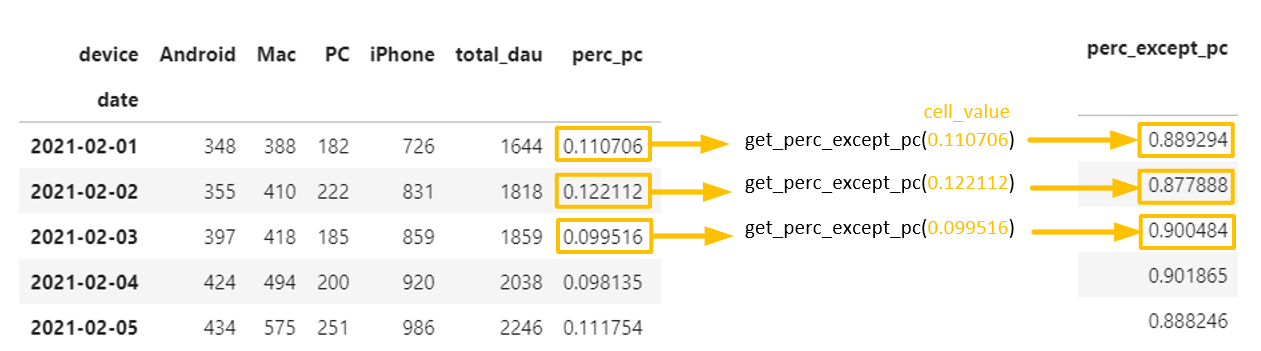

Таким образом, если вы хотите модифицировать столбец или создать новый столбец, используя данные только одного столбца, то вы используете формат

**-    dau[ИМЯ_СТОЛБЦА_1] = dau[ИМЯ_СТОЛБЦА_2].apply(ПРИМЕНЯЕМАЯ_ФУНКЦИЯ)**

Если вы хотите вычислить значение столбца, используя значения нескольких столбцов, то apply нужно применять по-другому.

**Пример 2**: допустим, вы хотете вычислить, какой процент от общего DAU составляет сумма DAU для платформ Android и Mac. Для этого напишем функцию:

In [34]:
def get_perc_android_mac(row_values):
    return (row_values['Android'] + row_values['Mac']) / row_values['total_dau']

dau['perc_android_mac'] = dau.apply(get_perc_android_mac, axis = 1)
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,472,303,312,640,1727,0.180660,0.819340,0.448755
2021-02-02,549,325,328,697,1899,0.172722,0.827278,0.460242
2021-02-03,593,349,336,716,1994,0.168506,0.831494,0.472417
2021-02-04,618,372,356,756,2102,0.169363,0.830637,0.470980
2021-02-05,653,380,375,840,2248,0.166815,0.833185,0.459520


Посмотрим, как это работает:

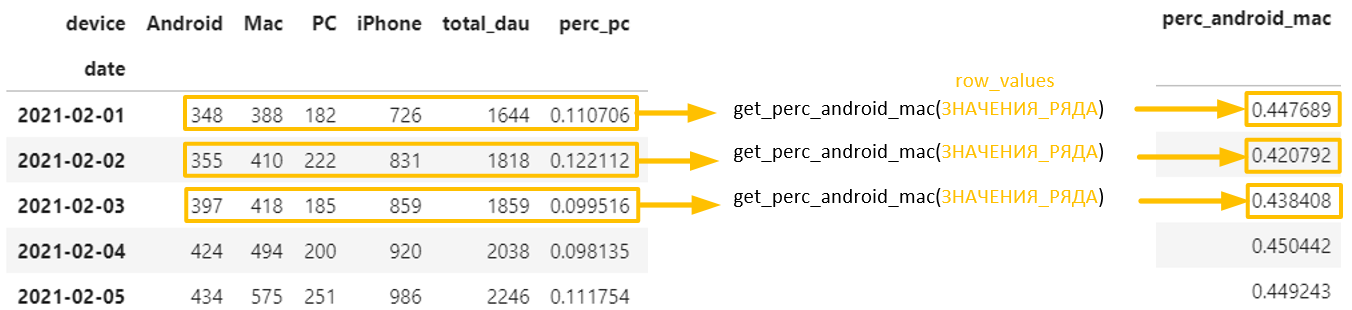

Обратите внимание на то, как применяется команда apply в этом случае:
1. apply применяется не к конкретному столбцу, а к фрейму целиком: **dau.apply(...)**
2. При вызове apply указывается **axis = 1**. Это означает, что внуть функции get_perc_android_mac будет переданы **все значения текущего ряда**.
- (**axis = 0** - будет указывать на все значения в столбце, а не ряде/строке)

**Apply - это второй по скорости метод массовой модификации данных в фреймах**.

## 3.4.3 Прямая модификация данных в ячейках с помощью .loc

Кроме этих двух способов, существует метод, который позволяет изменять данные в фрейме, указывая координаты ячеек напрямую:

In [35]:
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,472,303,312,640,1727,0.180660,0.819340,0.448755
2021-02-02,549,325,328,697,1899,0.172722,0.827278,0.460242
2021-02-03,593,349,336,716,1994,0.168506,0.831494,0.472417
2021-02-04,618,372,356,756,2102,0.169363,0.830637,0.470980
2021-02-05,653,380,375,840,2248,0.166815,0.833185,0.459520


In [36]:
test_dau = dau.copy()

Получим доступ к ячейке с координатами '2021-02-04' и 'iPhone':

In [37]:
dau.loc['2021-02-04', 'iPhone']

756.0

И модифицируем ее значение:

In [38]:
dau.loc['2021-02-04', ['iPhone', 'Mac']] = 0
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,472,303,312,640,1727,0.180660,0.819340,0.448755
2021-02-02,549,325,328,697,1899,0.172722,0.827278,0.460242
2021-02-03,593,349,336,716,1994,0.168506,0.831494,0.472417
2021-02-04,618,0,356,0,2102,0.169363,0.830637,0.470980
2021-02-05,653,380,375,840,2248,0.166815,0.833185,0.459520


Если нам нужно модфицировать несколько значений, то мы можем сделать это так:

In [39]:
dau.loc[dau.index <= '2021-02-03'] = -1
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-02,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-03,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-04,618,0,356,0,2102,0.169363,0.830637,0.47098
2021-02-05,653,380,375,840,2248,0.166815,0.833185,0.45952


Это по сути похоже на работу функции **query** которая только показывает, но не изменяет значение ячеек ... ???

In [40]:
dau.query("date <= '2021-02-03'")

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0
2021-02-02,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0
2021-02-03,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0


**Функция loc меняет (перезаписывает) значения в самой таблице!!!**:

In [41]:
dau.loc[dau.index <= '2021-02-03'] = -1
dau.head(5)

device,Android,Mac,PC,iPhone,total_dau,perc_pc,perc_except_pc,perc_android_mac
date,,,,,,,,
2021-02-01,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-02,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-03,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.00000
2021-02-04,618,0,356,0,2102,0.169363,0.830637,0.47098
2021-02-05,653,380,375,840,2248,0.166815,0.833185,0.45952


## 3.5 Анализ DAU

Давайте посмотрим как анализировать DAU. Снова построим фрейм с разбивкой DAU по устройствам: 

In [42]:
dau = data.pivot_table(index = 'date', columns = 'device', values = 'user_id', aggfunc = 'nunique')
dau.head(5)

device,Android,Mac,PC,iPhone
date,,,,
2021-02-01,472,303,312,640
2021-02-02,549,325,328,697
2021-02-03,593,349,336,716
2021-02-04,618,372,356,756
2021-02-05,653,380,375,840


Построим график:

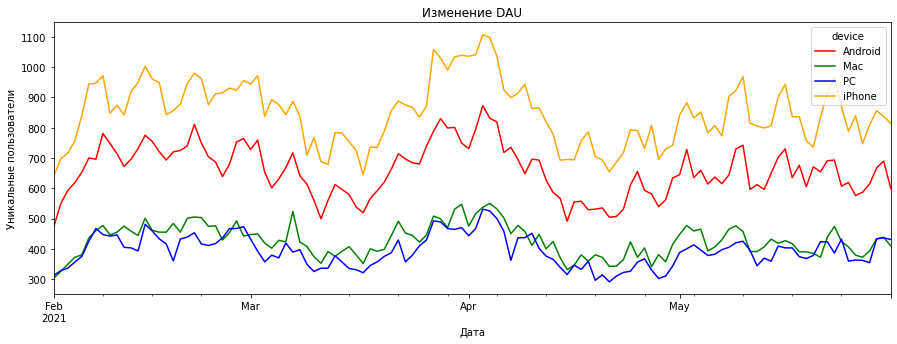

In [43]:
dau.plot(figsize = (15, 5), color = ['red', 'green', 'blue', 'orange'])
plt.title('Изменение DAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи');

Какие выводы мы можем следать по этому графику:
1. Большинство пользователей системы используют iPhone;
2. В данных явно наблюдается недельная и месячная сезонность, но, в целом посещаемость стабильная.

Давайте используем наши навыки о модификации данных в фреймах для того, чтобы посчитать какой процент от DAU составляют пользователи с мобильных устройств:
- Перед началом работы с фреймом создаем копию **dau_perc = dau.copy()**, таким образом **не изменяем основной фрейм dau**
- Если мы просто попытаемся создать новую переменную **dau_perc = dau**, то это изменит основной фрейм dau
- Можно создать и проверить с помщью функции id: **id(dau_perc)** будет равно **id(dau)**

In [44]:
dau_perc = dau.copy()
dau_perc['Total'] =  dau_perc.sum(axis = 1)
mobile_types = ['Android', 'iPhone']
dau_perc['Mobile'] = dau_perc[mobile_types].sum(axis = 1)
dau_perc['Others'] = dau_perc['Total'] - dau_perc['Mobile']
dau_perc.head()

device,Android,Mac,PC,iPhone,Total,Mobile,Others
date,,,,,,,
2021-02-01,472,303,312,640,1727,1112,615
2021-02-02,549,325,328,697,1899,1246,653
2021-02-03,593,349,336,716,1994,1309,685
2021-02-04,618,372,356,756,2102,1374,728
2021-02-05,653,380,375,840,2248,1493,755


In [45]:
dau_perc = dau.copy()
dau_perc['Total'] =  dau_perc['Android'] + dau_perc['Mac'] + dau_perc['PC'] + dau_perc['iPhone']
dau_perc['Mobile'] = dau_perc['Android'] + dau_perc['iPhone']
dau_perc['Others'] = dau_perc['Mac'] + dau_perc['PC']
dau_perc.head(5)

device,Android,Mac,PC,iPhone,Total,Mobile,Others
date,,,,,,,
2021-02-01,472,303,312,640,1727,1112,615
2021-02-02,549,325,328,697,1899,1246,653
2021-02-03,593,349,336,716,1994,1309,685
2021-02-04,618,372,356,756,2102,1374,728
2021-02-05,653,380,375,840,2248,1493,755


Переведем столбцы в проценты:

In [46]:
dau_perc['Mobile'] = dau_perc['Mobile'] / dau_perc['Total']
dau_perc['Others'] = dau_perc['Others'] / dau_perc['Total']
dau_perc.head(5)

device,Android,Mac,PC,iPhone,Total,Mobile,Others
date,,,,,,,
2021-02-01,472,303,312,640,1727,0.643891,0.356109
2021-02-02,549,325,328,697,1899,0.656135,0.343865
2021-02-03,593,349,336,716,1994,0.656469,0.343531
2021-02-04,618,372,356,756,2102,0.653663,0.346337
2021-02-05,653,380,375,840,2248,0.664146,0.335854


Построим диаграммы с накоплением:

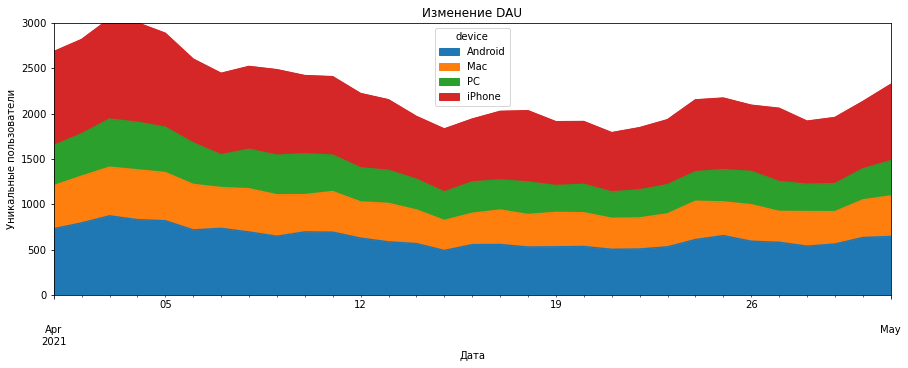

In [47]:
dau_perc[['Android', 'Mac', 'PC', 'iPhone']].plot.area(figsize = (15, 5))
plt.title('Изменение DAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи')
plt.axis(['2021-04-01', '2021-05-01', 0, 3000])
plt.show()

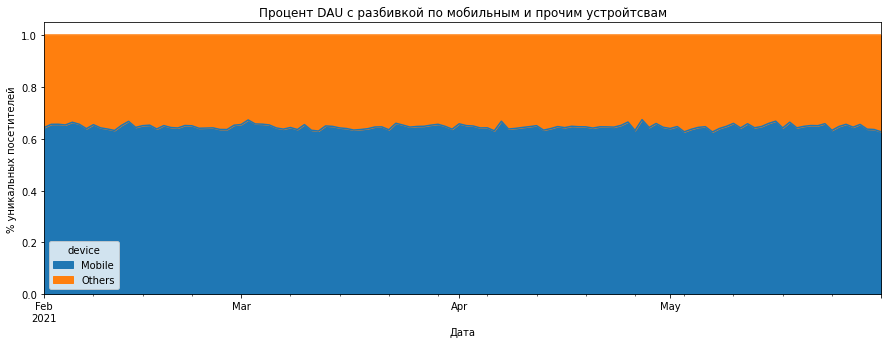

In [48]:
dau_perc[['Mobile', 'Others']].plot.area(figsize = (15, 5))
plt.title('Процент DAU с разбивкой по мобильным и прочим устройтсвам'), plt.xlabel('Дата'), plt.ylabel('% уникальных посетителей');

<AxesSubplot:xlabel='date'>

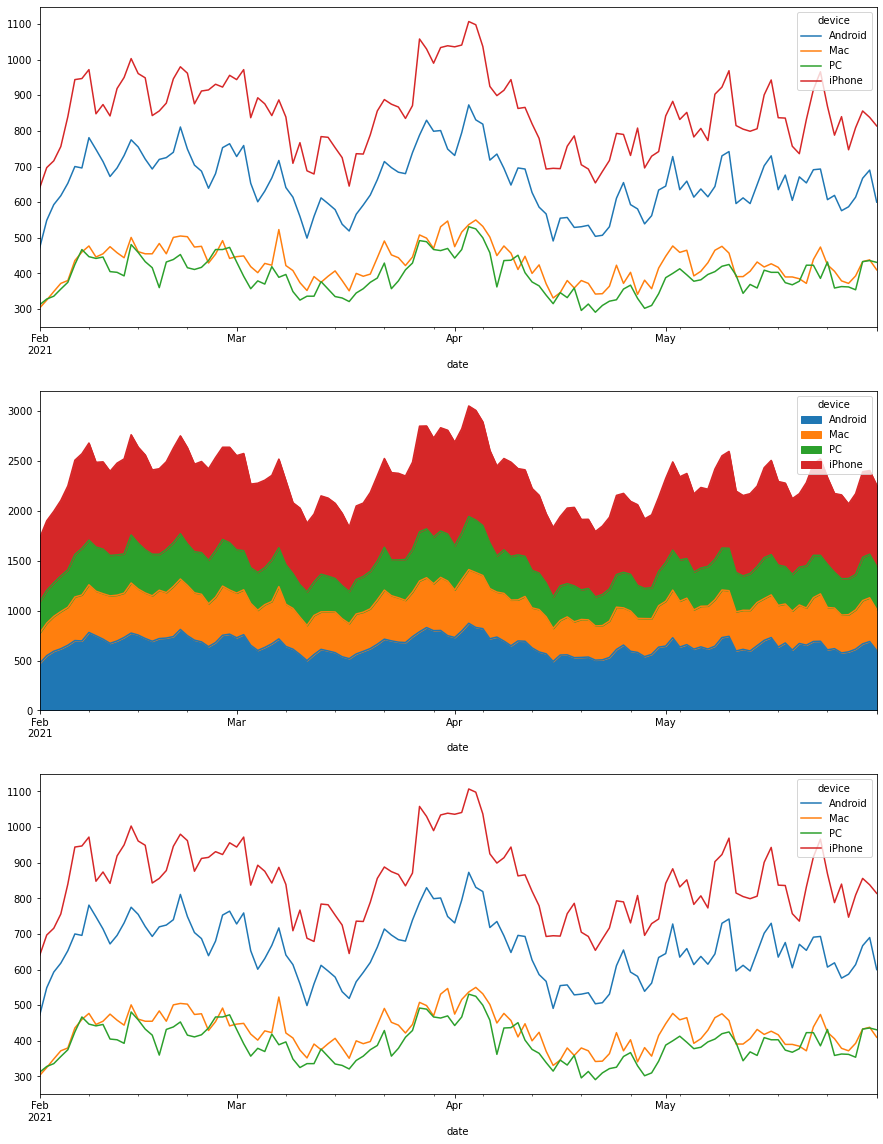

In [49]:
plt.figure(figsize = (15,20))
dau.plot(ax = plt.subplot(3, 1, 1))
dau_perc[['Android', 'Mac', 'PC', 'iPhone']].plot.area(ax = plt.subplot(3, 1, 2))
dau.plot(ax = plt.subplot(3, 1, 3))

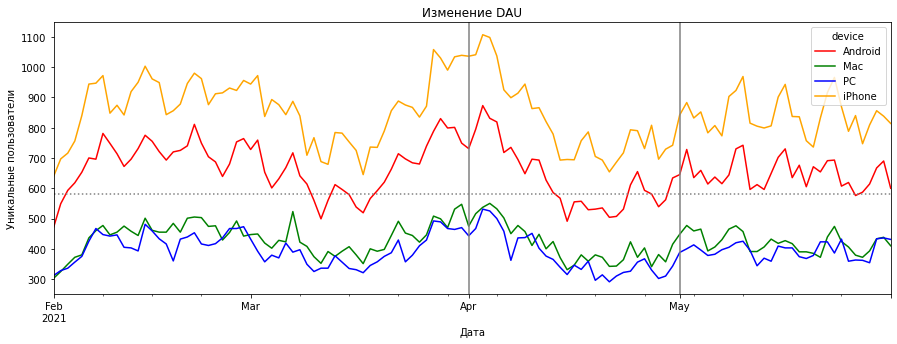

In [50]:
dau = data.pivot_table(index = 'date', columns = 'device', values = 'user_id', aggfunc = 'nunique')
dau.plot(figsize = (15, 5), color = ['red', 'green', 'blue', 'orange'])
plt.axhline((dau.sum(axis=1)/4).mean(), color = 'grey', linestyle = ':')
plt.axvline('2021-04-01', color = 'grey')
plt.axvline('2021-05-01', color = 'grey')
plt.title('Изменение DAU'), plt.xlabel('Дата'), plt.ylabel('Уникальные пользователи');

Вывод: примерно 65% всей аудитории приходят с мобильных устройств. Когда продуктовые менеджеры разрабатывают новые фичи, они должны прежде всего ориентироваться на мобильных пользователей.

## Заключение

В это уроке вы узнали:
- Что такое DAU и как оно используется;
- Как строить линейные графики и графики областей с накоплением;
- Как выполнять математические операции над столбцами;
- Как модифицировать данные с помощью apply;
- Как управлять значениями с помощью loc.

## Дополнительные материалы

1. Еще немного про DAU и некоторые другие KPI https://gravitec.net/ru/blog/mau-dau-arpu-ili-metriki-poseshhaemosti-kotory-e-nado-znat/
2. Коды цветов на графиках matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html